C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


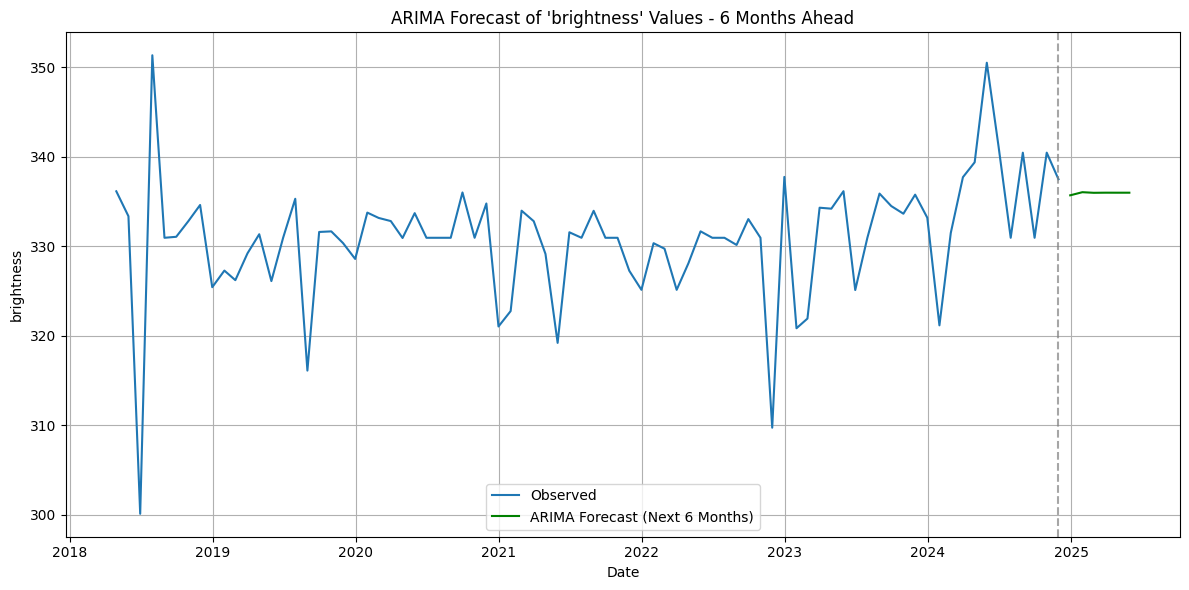

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

# Load the dataset
df = pd.read_csv('../../data/a1/bkk_firemap_imputed.csv', parse_dates=['acq_date'])
df.set_index('acq_date', inplace=True)

# Fit ARIMA model (no seasonal_order)
model = ARIMA(df['brightness'], order=(1,1,1))
results = model.fit()

# Forecast next 6 months
forecast_steps = 6
future_dates = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['brightness'], label='Observed')
plt.plot(future_dates, forecast_mean, color='green', label='ARIMA Forecast (Next 6 Months)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("ARIMA Forecast of 'brightness' Values - 6 Months Ahead")
plt.xlabel("Date")
plt.ylabel("brightness")
plt.grid(True)
plt.tight_layout()
plt.show()

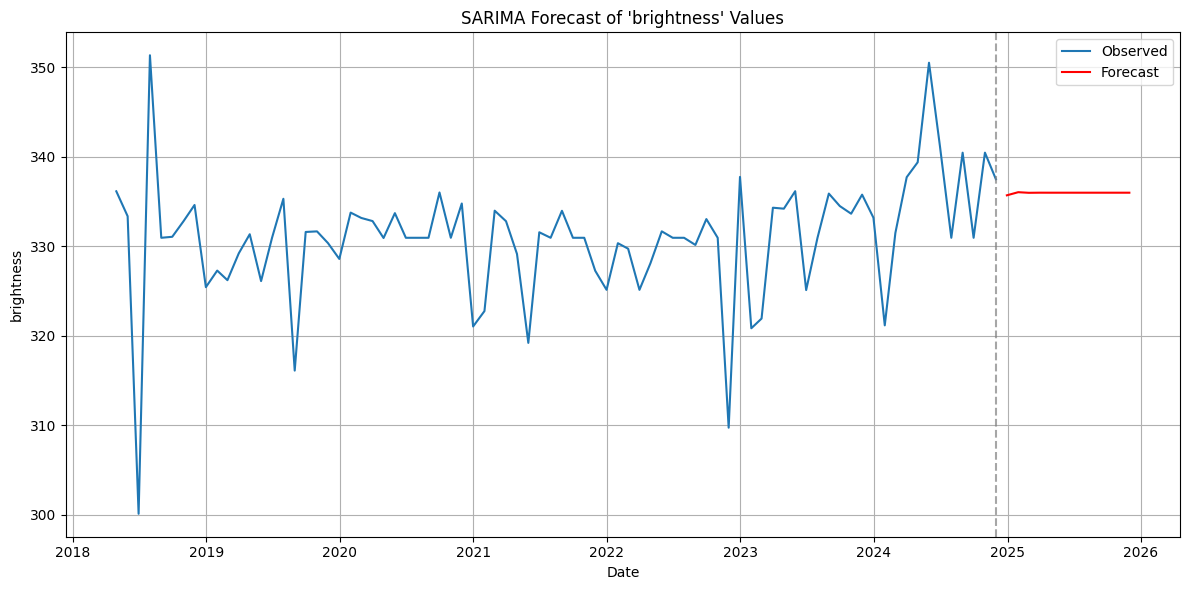

In [2]:
forecast_steps = 12
future_dates = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['brightness'], label='Observed')
plt.plot(future_dates, forecast_mean, color='red', label='Forecast')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'brightness' Values")
plt.xlabel("Date")
plt.ylabel("brightness")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'brightness')

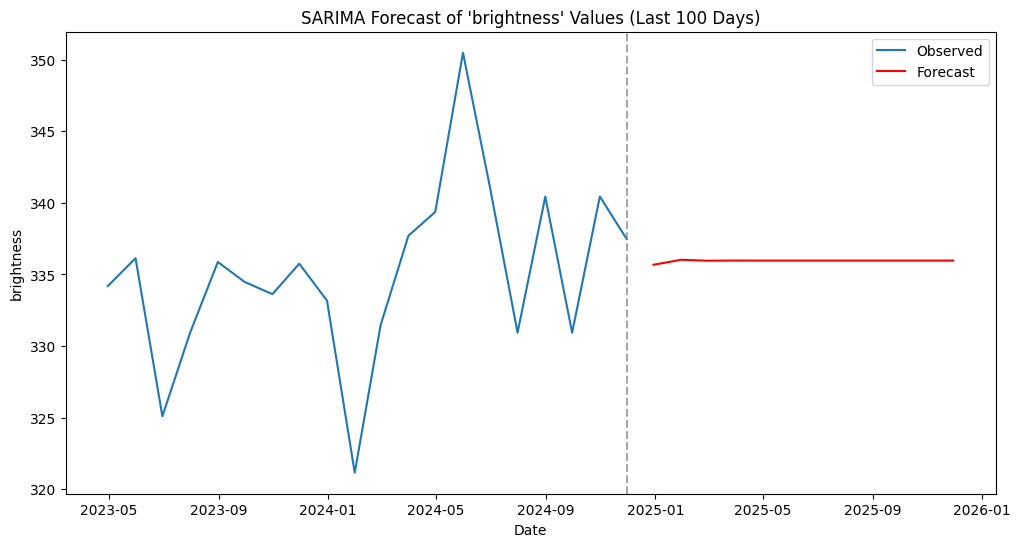

In [3]:
#zoom only last 100 days
plt.figure(figsize=(12, 6))
plt.plot(df.index[-20:], df['brightness'][-20:], label='Observed')
plt.plot(future_dates, forecast_mean[-20:], color='red', label='Forecast')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'brightness' Values (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("brightness")

In [4]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split
train = df.iloc[:-6]
test = df.iloc[-6:]

# Fit ARIMA model (no seasonal_order)
model = ARIMA(train['brightness'], order=(1,1,1))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean

# Evaluation
mae = mean_absolute_error(test['brightness'], forecast_mean)
rmse = np.sqrt(mean_squared_error(test['brightness'], forecast_mean))

# Avoid division by zero in MAPE
nonzero_mask = test['brightness'].values != 0
mape = np.mean(
    np.abs((test['brightness'].values[nonzero_mask] - forecast_mean.values[nonzero_mask]) / test['brightness'].values[nonzero_mask])
) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE:  6.24
RMSE: 7.33
MAPE: 1.84%


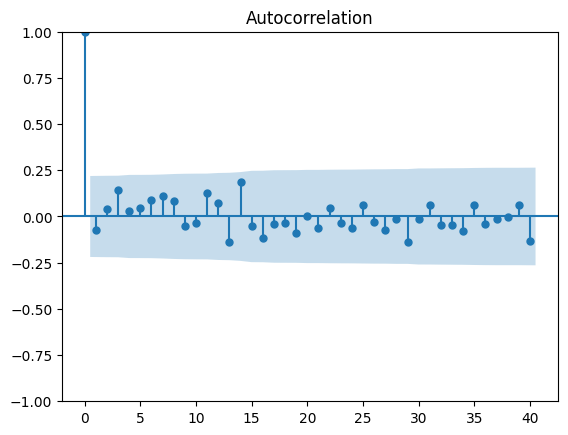

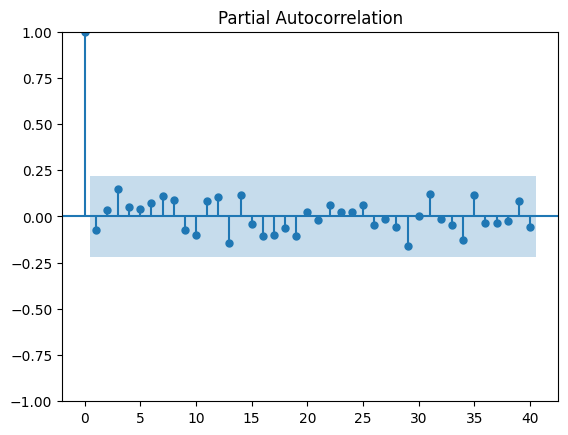

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['brightness'].dropna(), lags=40)
plot_pacf(df['brightness'].dropna(), lags=40)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(df['brightness'].dropna())

# Check p-value to determine stationarity
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Data is non-stationary, apply differencing (d=1)")
else:
    print("Data is stationary, no differencing (d=0)")


ADF Statistic: -9.432566725348424
p-value: 5.143080111111498e-16
Data is stationary, no differencing (d=0)


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # Train-test split
# train = df.iloc[:-6]
# test = df.iloc[-6:]

# # Fit ARIMA model (no seasonal_order)
# model = ARIMA(train['brightness'], order=(15,20,0))
# results = model.fit()

# # Forecast
# forecast = results.get_forecast(steps=6)
# forecast_mean = forecast.predicted_mean

# # Evaluation
# mae = mean_absolute_error(test['brightness'], forecast_mean)
# rmse = np.sqrt(mean_squared_error(test['brightness'], forecast_mean))

# # Avoid division by zero in MAPE
# nonzero_mask = test['brightness'].values != 0
# mape = np.mean(
#     np.abs((test['brightness'].values[nonzero_mask] - forecast_mean.values[nonzero_mask]) / test['brightness'].values[nonzero_mask])
# ) * 100

# print(f"MAE:  {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAPE: {mape:.2f}%")

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MAE:  8479836480.94
RMSE: 16838690543.77
MAPE: 2510455322.99%


C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the parameter grid
p_values = range(0, 3)  # AR terms (p)
d_values = range(0, 2)  # Differencing terms (d)
q_values = range(0, 3)  # MA terms (q)

# Grid search for best (p,d,q)
best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df['brightness'], order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print(f"Best ARIMA model: order={best_order} with AIC={best_aic}")

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('

Best ARIMA model: order=(0, 1, 2) with AIC=539.0543732593746


C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
